In [3]:
import pandas as pd

In [4]:
url = "https://raw.githubusercontent.com/Bl3f/amse2021/main/The%20movie%20database/tmdb_5000_movies.csv"
movies = pd.read_csv(
    url,
    parse_dates=["release_date"],
    infer_datetime_format=True,
)
movies = movies.dropna(subset=["release_date"])
# ^-- supprime toutes les lignes (axis=0) dans le cas où 
# release_date est null

In [22]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


# Q2

In [23]:
movies["revenue"].sum()

395097847444

# Q3

In [24]:
# 2 manières de le faire
# - En considérant la date comme une str on prend les 4 premiers char
# - En convertissant la date en datetime on récupère l'année

In [25]:
# 2022-03-18 ---> AAAA-MM-DD -----> %Y-%m-%d

In [40]:
# récupérer l'année en considérent la date comme une str
movies["release_year"] = movies["release_date"].str[:4]

In [47]:
# convertir la date en datetime
movies["release_year"] = pd.to_datetime(movies["release_date"]).dt.year

In [51]:
# dans le cas où on a changé le read_csv avec :
# movies = pd.read_csv(
#    ...
#    parse_dates=["release_date"],
#    infer_datetime_format=True,
# )
movies["release_year"] = movies["release_date"].dt.year

In [32]:
# movies[movies["release_date"].isnull()]

## Q3.2 — Créer une colonne profit

In [53]:
movies["profit"] = movies["revenue"] - movies["budget"]

## Q3.3 — Afficher le profit par année

In [54]:
# pour afficher le profit par année on a d'abord besoin de 
# calculer le profit par année
profit_per_year = movies.groupby("release_year")["profit"].sum()

In [55]:
profit_per_year

release_year
1916        8008844
1925       21755000
1927      -91969578
1929        3979000
1930        4050000
           ...     
2013    15205612461
2014    16752037278
2015    16050476854
2016     9708016948
2017              0
Name: profit, Length: 90, dtype: int64

<AxesSubplot:xlabel='release_year'>

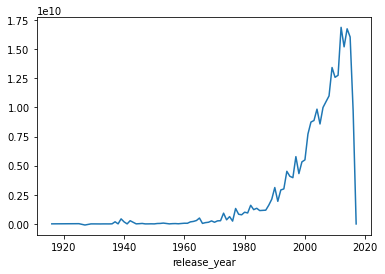

In [56]:
profit_per_year.plot()

<AxesSubplot:xlabel='release_year'>

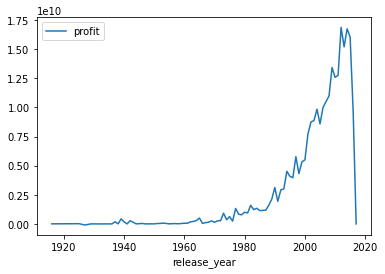

In [65]:
profit_per_year.reset_index().plot(x="release_year", y="profit")

<AxesSubplot:xlabel='release_year'>

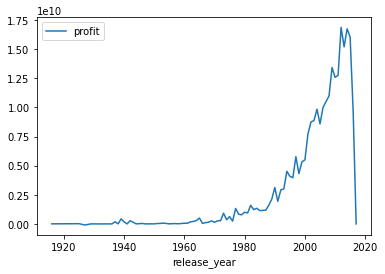

In [74]:
movies.groupby("release_year").agg({"profit": "sum"}).plot()

## Q4 — Trouver le film qui a été le plus profitable

In [79]:
movies[movies["profit"] == movies["profit"].max()]["title"]

0    Avatar
Name: title, dtype: object

In [82]:
movies.sort_values("profit", ascending=False)["title"].head(1)

0    Avatar
Name: title, dtype: object

# Q5 — Quel est le mot le plus présent dans les descriptions

In [20]:
all_words = movies["overview"].dropna().str.lower().str.split().sum()

In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
# nltk.download('stopwords')

In [23]:
words_series = pd.Series(all_words)

In [100]:
words_series[~words_series.isin(stopwords.words('english'))].value_counts()

new            708
one            647
young          615
life           563
two            531
              ... 
why,             1
tessa            1
quietly,         1
quayle           1
herzlinger,      1
Length: 34123, dtype: int64